In [2]:
import json
import pickle
import pandas as pd
from tqdm import tqdm

In [3]:
from plot_utils import *

In [88]:
zz=load_json("MPS_(0,1)_L10_p0.540_s7298_a1.json")

# Generate Parameters

In [4]:
import numpy as np
import os
from functools import reduce

## Print parameters 

In [36]:
!rm params_CT_MPS_l.txt

In [4]:
np.arange(60,201,10)

array([ 60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180,
       190, 200])

In [ ]:
# p_list=np.linspace(0.4,.6,21)
# L_list= [8,10,12,14,16,18]
# L_list= np.arange(60,201,10)
# p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params(nu=0,de=1,L_list=L_list,seed_list=range(2000,10000),p_list=p_list,ancilla_list=[1],filename=None,exist=False,filelist=None)
# ,30,40,50
# 'params_CT_MPS_l.txt'

In [4]:
p_list=np.linspace(0.4,.6,21)
L_list= [8,10,12,14,16,18]

generate_params(
    fixed_params={'nu':0,'de':1},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000,10000),'ancilla':[1]},
    fn_template='MPS_({nu},{de})_L{L}_p{p:.3f}_s{seed}_a{ancilla}.json',
    fn_dir_template='MPS_{nu}-{de}',
    input_params_template='{p:.3f} {L} {seed} {ancilla}',
    load_data=load_json,
    filename=None, # 'params_CT_MPS_l.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

# ,30,40,50
# 'params_CT_MPS_l.txt'  
    

generate_params: 100%|██████████| 1008000/1008000 [00:05<00:00, 184957.48it/s]


['0.420 8 8997 1',
 '0.450 8 3092 1',
 '0.460 8 3703 1',
 '0.470 8 3391 1',
 '0.470 8 3413 1',
 '0.480 8 5918 1',
 '0.490 8 7834 1',
 '0.490 8 7841 1',
 '0.500 8 8104 1',
 '0.510 8 7852 1',
 '0.520 8 9326 1',
 '0.520 8 9446 1',
 '0.520 8 9450 1',
 '0.520 8 9452 1',
 '0.520 8 9788 1',
 '0.530 8 8113 1',
 '0.540 8 2387 1',
 '0.540 8 4034 1',
 '0.550 8 8829 1',
 '0.560 8 2069 1',
 '0.560 8 6691 1',
 '0.570 8 8496 1',
 '0.580 8 2859 1',
 '0.590 8 4083 1',
 '0.590 8 8924 1',
 '0.600 8 3821 1',
 '0.600 8 5658 1',
 '0.600 8 5907 1',
 '0.400 10 8703 1',
 '0.400 10 9287 1',
 '0.400 10 9474 1',
 '0.400 10 9584 1',
 '0.400 10 9880 1',
 '0.400 10 9918 1',
 '0.410 10 2033 1',
 '0.410 10 2048 1',
 '0.410 10 2053 1',
 '0.410 10 2107 1',
 '0.410 10 2155 1',
 '0.410 10 2158 1',
 '0.410 10 2233 1',
 '0.410 10 2234 1',
 '0.410 10 2258 1',
 '0.410 10 2326 1',
 '0.410 10 2335 1',
 '0.410 10 2664 1',
 '0.410 10 2699 1',
 '0.410 10 2701 1',
 '0.410 10 2717 1',
 '0.410 10 2721 1',
 '0.410 10 2755 1',
 '0.410 

## Load data

In [38]:
# data_0_1_dict={'fn':{}}
p_list=np.linspace(0.4,.6,21)
L_list= np.arange(10,61,10)
# p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params(nu=0,de=1,L_list=L_list,seed_list=range(2000),p_list=p_list,ancilla_list=[0,],filename=None,exist=True,filelist=None,load=True,data_dict=data_0_1_dict)

data_0_1_dict=generate_params(
    fixed_params={'nu':0,'de':1,'ancilla':0},
    vary_params={'L':L_list,'p':p_list,'seed':range(10000)},
    fn_template='MPS_({nu},{de})_L{L}_p{p:.3f}_s{seed}_a{ancilla}.json',
    fn_dir_template='MPS_{nu}-{de}',
    input_params_template='{p:.3f} {L} {seed} {ancilla}',
    load_data=load_json,
    filename=None,
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='MPS_({nu},{de})_a{ancilla}.pickle', 
    )

df_0_1=convert_pd(data_0_1_dict,names=['Metrics','L','p'])


generate_params: 100%|██████████| 1260000/1260000 [00:17<00:00, 70764.28it/s]


In [39]:
df_0_1

observations
Metrics  L  p                                                      
max_bond 10 0.40  [8, 16, 8, 2, 29, 16, 8, 2, 8, 16, 16, 4, 32, ...
O        10 0.40  [0.08441838130079424, 0.0936498107032479, 0.00...
EE       10 0.40  [0.23351159051681109, 1.2064676434615285, 0.46...
max_bond 10 0.41  [4, 16, 16, 2, 29, 8, 8, 4, 16, 16, 16, 4, 2, ...
O        10 0.41  [0.10552527040736862, 0.07583149471451256, -0....
...                                                             ...
         60 0.52  [0.923462076409132, 0.8625173715561157, 0.8057...
EE       60 0.52  [4.440892098500625e-16, 3.996802888650556e-15,...
max_bond 60 0.53  [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...
O        60 0.53  [0.9710638519270182, 0.9205797950320409, 0.874...
EE       60 0.53  [6.661338147750936e-16, 3.996802888650556e-15,...

[357 rows x 1 columns]

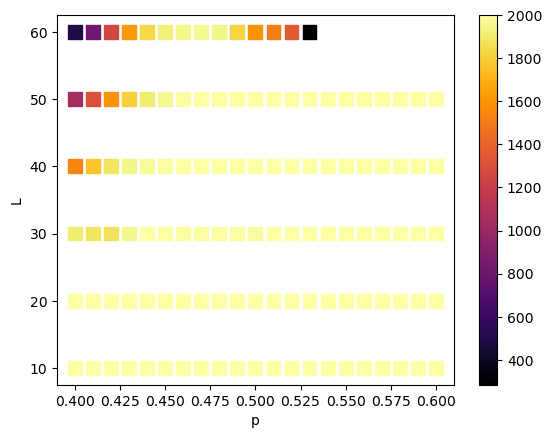

In [40]:
visualize_dataset(df_0_1,xlabel='p',ylabel='L',)

In [5]:
# data_0_1_anc_dict={'fn':{}} # Reconstruct from empty dict

p_list=np.linspace(0.4,.6,21)
L_list= list(range(8,21,2))
# L_list= list(range(8,11,2))
# +list(range(20,61,10))



data_0_1_anc_dict=generate_params(
    fixed_params={'nu':0,'de':1,'ancilla':1},
    vary_params={'L':L_list,'p':p_list,'seed':range(10000)},
    fn_template='MPS_({nu},{de})_L{L}_p{p:.3f}_s{seed}_a{ancilla}.json',
    fn_dir_template='MPS_{nu}-{de}',
    input_params_template='{p:.3f} {L} {seed} {ancilla}',
    load_data=load_json,
    filename=None,
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='MPS_({nu},{de})_a{ancilla}.pickle', 
    )

df_0_1_anc=convert_pd(data_0_1_anc_dict,names=['Metrics','L','p'])


generate_params: 100%|██████████| 1470000/1470000 [00:07<00:00, 204241.51it/s]


In [6]:
df_0_1_anc

,,,observations
Metrics,L,p,
O,8,0.40,"[0.13774174784115598, -0.1698096282851106, 0.2..."
max_bond,8,0.40,"[15, 8, 16, 8, 16, 16, 4, 8, 4, 4, 8, 16, 1, 8..."
EE,8,0.40,"[0.6402244439987284, 0.6783570438015544, 0.672..."
O,8,0.41,"[0.07997638681135684, -0.030276704564591365, 0..."
max_bond,8,0.41,"[15, 16, 16, 8, 16, 16, 4, 2, 4, 4, 8, 8, 1, 4..."
...,...,...,...
O,20,0.59,"[0.7962689887140457, 0.6839175658061103, 0.702..."
EE,20,0.59,"[1.110223024625156e-15, -1.776356839400252e-15..."
max_bond,20,0.60,"[2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 4, 2, 1, ..."


In [7]:
df_0_1_anc.index.get_level_values('L').unique()


Int64Index([8, 10, 12, 14, 16, 18, 20], dtype='int64', name='L')

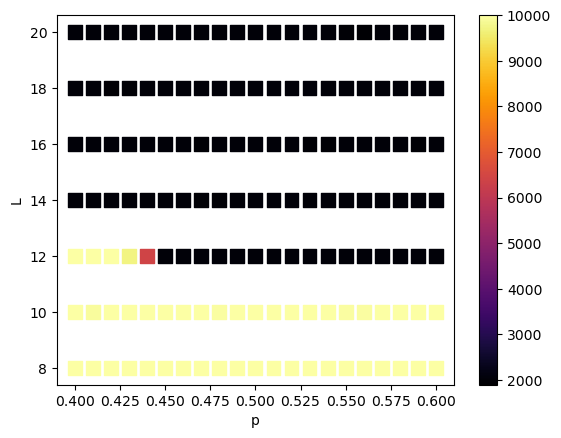

In [8]:
visualize_dataset(df_0_1_anc,xlabel='p',ylabel='L',)

# API

In [9]:
import matplotlib.pyplot as plt
import scipy
from functools import partial

In [10]:
import matplotlib.patches as mpatches

In [11]:
def plot_line(df,ax=None,params={'Metrics':'O','p':0,},L_list=None,yscale=None,ylim=None,method=np.mean,errorbar=False):
    if ax is None:
        fig,ax=plt.subplots()
    assert method in {np.mean,np.var}, f'the method should be either np.mean or np.var. {method} is not currently supported.'
    x_name='p'
    title_name='p'
    op_str={np.mean:r'\overline',np.var:r'Var~'}
    ylabel_name={'O':rf'${op_str[method]}{{\langle O \rangle}}$','EE':rf'${op_str[method]}{{ S_{{L/2}} }}$','TMI':rf'${op_str[method]}{{I_3}}$','SA':rf'${op_str[method]}{{ S_{{anc}} }}$','max_bond':rf'${op_str[method]}{{\chi}}$'}
    df=df.xs(params.values(),level=list(params.keys()))
    if L_list is None:
        L_list=np.sort(df.index.get_level_values('L').unique())
    colormap = (plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(L_list.shape[0]))
    for L in sorted(L_list):
        dd=df.xs(key=L,level='L')['observations'].apply(method)
        if errorbar:
            if method is np.mean:
                dd_se=df.xs(key=L,level='L')['observations'].apply(np.std).values/np.sqrt(df.xs(key=L,level='L')['observations'].apply(len).values)
            if method is np.var:
                mu4=df.xs(key=L,level='L')['observations'].apply(partial(scipy.stats.moment,moment=4)).values
                mu2=df.xs(key=L,level='L')['observations'].apply(partial(scipy.stats.moment,moment=2)).values
                n=(df.xs(key=L,level='L')['observations'].apply(len).values)
                dd_se=np.sqrt((mu4-(n-3)/(n-1)*mu2**2)/n)
                
        x=dd.index.get_level_values(x_name)
        arg_sort=x.argsort()
        if yscale == 'log' and params['Metrics']== 'TMI':
            dd_sort=np.abs(dd.values[arg_sort])
            ylabel_name['TMI']=rf'${op_str[method]}{{|I_3|}}$'

        else:
            dd_sort=dd.values[arg_sort]
        if errorbar:
            ax.errorbar(x[arg_sort],dd_sort,yerr=dd_se[arg_sort],label=f'L={L}',lw=1,color=colormap.__next__(),capsize=2)
        else:
            ax.plot(x[arg_sort],dd_sort,'.-',label=f'L={L}',lw=1,color=colormap.__next__())
    ax.legend()
    if ylim is not None:
        ax.set_ylim(ylim)
    if yscale is not None:
        ax.set_yscale(yscale)
    ax.set_ylabel(ylabel_name[params['Metrics']])
    ax.set_xlabel(x_name)
    # ax.set_title(f'{title_name}={params[title_name]:.2f}')

In [12]:
def plot_inset(data,ax,xlim,ylim,ax_inset_pos,L_list,params,yscale,method):
    # .27,.3
    # .6,.63
    axins = ax.inset_axes(ax_inset_pos,transform=ax.transAxes)
    plot_line(data,params=params,ax=axins,L_list=L_list,yscale=yscale,method=method)
    axins.grid('on')
    axins.set_xlim(xlim)
    axins.set_ylim(ylim)
    axins.legend().remove()
    axins.set_ylabel('')
    axins.set_title('')
    axins.set_xlabel('')
    rect=mpatches.Rectangle((xlim[0],ylim[0]),xlim[1]-xlim[0],ylim[1]-ylim[0],ls='dashed',fill=None,lw=0.5,zorder=10)
    ax.add_patch(rect)
    if xlim[0]>=0.6*(ax_inset_pos[0]) and xlim[1]>=0.6*(ax_inset_pos[0]+ax_inset_pos[1]):
        dashed_coord_1=(xlim[0],ylim[1])
        inset_coord_1=(0,1)
        dashed_coord_2=(xlim[1],ylim[0])
        inset_coord_2=(1,0)
    elif xlim[0]>=0.6*(ax_inset_pos[0]) and xlim[1]<0.6*(ax_inset_pos[0]+ax_inset_pos[1]):
        dashed_coord_1=(xlim[0],ylim[1])
        inset_coord_1=(0,1)
        dashed_coord_2=(xlim[1],ylim[1])
        inset_coord_2=(1,1)
    elif xlim[0]<0.6*(ax_inset_pos[0]) and xlim[1]<0.6*(ax_inset_pos[0]+ax_inset_pos[1]):
        dashed_coord_1=(xlim[0],ylim[0])
        inset_coord_1=(0,0)
        dashed_coord_2=(xlim[1],ylim[1])
        inset_coord_2=(1,1)

    line1=mpatches.ConnectionPatch(dashed_coord_1, inset_coord_1, coordsA='data',coordsB='axes fraction',axes=ax,axesB=axins,ls='dashed',lw=0.5)
    ax.add_patch(line1)
    line2=mpatches.ConnectionPatch(dashed_coord_2, inset_coord_2, coordsA='data',coordsB='axes fraction',axes=ax,axesB=axins,ls='dashed',lw=0.5)
    ax.add_patch(line2)


In [13]:
def plot_SA_2(df_anc,L_list,xlim1,xlim2,ylim1,ylim2,ax_inset_pos1,ax_inset_pos2,metrics,p_ctrl=None,inset1=False,inset2=False,yscale=None,filename=None,dirpath='Fig',ylim=None,errorbar=False,method=np.mean):
    fig,ax=plt.subplots(figsize=(6.8,5))
    params={'Metrics':metrics,}
    # adder=df_anc.index.get_level_values('adder').unique().tolist()[0]
    plot_line(df_anc,params=params,ax=ax,L_list=L_list,yscale=yscale,ylim=ylim,errorbar=errorbar,method=method)
    ax.grid('on')
    ax.set_xlim(0,0.6)
    if inset1:
        plot_inset(df_anc,ax,xlim=xlim1,ylim=ylim1,ax_inset_pos=ax_inset_pos1,params=params,L_list=L_list,yscale=yscale,method=method)

    if inset2:
        plot_inset(df_anc,ax,xlim=xlim2,ylim=ylim2,ax_inset_pos=ax_inset_pos2,params=params,L_list=L_list,yscale=yscale,method=method)
    

    if filename is not None:
        if filename== 'auto':
            method_name={np.mean:'mean',np.var:'var'}
            filename= f'{metrics}_{method_name[method]}_L({L_list[0]},{L_list[-1]}){"_log" if yscale else ""}.png'
        print(filename)
        # plt.subplots_adjust(left=(.8)/fig.get_size_inches()[0],right=1-(.1)/fig.get_size_inches()[0],bottom=.5/fig.get_size_inches()[1],top=1-.2/fig.get_size_inches()[1])
        # fig.savefig(os.path.join(dirpath,filename),)

In [14]:
from matplotlib.colors import LogNorm
import torch
class Optimizer:
    def __init__(self,p_c,nu,df,params={'Metrics':'O',},p_range=[-0.1,0.1],Lmin=None,Lmax=None,bootstrap=False,gaussian_check=False):
        self.p_c=torch.tensor([p_c],requires_grad=False)
        self.nu=torch.tensor([nu],requires_grad=False)
        self.p_range=p_range
        self.Lmin=0 if Lmin is None else Lmin
        self.Lmax=100 if Lmax is None else Lmax
        self.bootstrap=bootstrap
        self.gaussian_check=gaussian_check
        self.params=params
        self.df=self.load_dataframe(df,params)
        self.L_i,self.p_i,self.d_i,self.y_i = self.load_data()

    
    def load_dataframe(self,df,params):
        df=df.xs(params.values(),level=list(params.keys()))['observations']
        df=df[(df.index.get_level_values('p')<=self.p_c.item()+self.p_range[1]) & (self.p_c.item()+self.p_range[0]<=df.index.get_level_values('p'))]
        df=df[(df.index.get_level_values('L')<=self.Lmax) & (self.Lmin<=df.index.get_level_values('L'))]
        if self.bootstrap:
            df=df.apply(lambda x: list(np.random.choice(x,size=len(x),replace=True)))
        if self.gaussian_check:
            print(df.apply(scipy.stats.shapiro))
        return df
    
    def load_data(self):
        L_i=torch.from_numpy(self.df.index.get_level_values('L').values)
        p_i=torch.from_numpy(self.df.index.get_level_values('p').values)
        d_i=torch.from_numpy(self.df.apply(np.std).values)/np.sqrt(self.df.apply(len).values)
        y_i=torch.from_numpy(self.df.apply(np.mean).values)
        assert p_i.unique().shape[0]>=4, f'not enough data points {p_i.unique().shape[0]}'
        return L_i,p_i,d_i,y_i

    def loss(self,p_c,nu,MLE=True):
        x_i=(self.p_i-p_c)*(self.L_i)**(1/nu)
        order=x_i.argsort()
        x_i_ordered=x_i[order]
        y_i_ordered=self.y_i[order]
        d_i_ordered=self.d_i[order]
        x={i:x_i_ordered[1+i:x_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        d={i:d_i_ordered[1+i:d_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        y={i:y_i_ordered[1+i:y_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        x_post_ratio=(x[1]-x[0])/(x[1]-x[-1])
        x_pre_ratio=(x[-1]-x[0])/(x[1]-x[-1])
        y_var=d[0]**2+(x_post_ratio*d[-1])**2+(x_pre_ratio*d[1])**2
        y_bar=x_post_ratio*y[-1]-x_pre_ratio*y[1]
        # return torch.sum((y[0]-y_bar)**2/y_var)
        if MLE:
            return self.MLE(y[0],y_bar,y_var)
        else:
            return self.chi2(y[0],y_bar,y_var)
    
    def loss_shift(self,p_c,nu,omega,a,b,c,d,):
        x_i=(self.p_i-p_c)*(self.L_i)**(1/nu)
        y_var=self.d_i**2
        self.y_i_fitted=a+b*x_i+c*x_i**2+d/self.L_i**omega
        return self.chi2(self.y_i_fitted,self.y_i,y_var)

    def chi2(self,y,y_fitted,sigma2):
        return 0.5*torch.sum((y-y_fitted)**2/sigma2)
    
    def MLE(self,y,y_fitted,sigma2):
        return 0.5*torch.sum((y-y_fitted)**2/sigma2)+0.5*torch.sum(torch.log(sigma2))

    
    def visualize(self,p_c_range,nu_range,trajectory=False,fig=True,ax=None,mapfunc=lambda x:x):
        p_c_list=np.linspace(*p_c_range,82)
        nu_list=np.linspace(*nu_range,80)
        loss_map=np.array([[self.loss(torch.tensor([p_c]),torch.tensor([nu]),MLE=False).item() for p_c in p_c_list] for nu in nu_list])
        if fig:
            if ax is None:
                fig, ax = plt.subplots()
            cm=ax.contourf(p_c_list,nu_list,mapfunc(loss_map),levels=20)
            ax.set_xlabel(r'$p_c$')
            ax.set_ylabel(r'$\nu$')
            plt.colorbar(cm)
            if trajectory:
                ax.scatter(self.p_c_history,self.nu_history,s=np.linspace(3,1,len(self.p_c_history))**2,)
            ct=ax.contour(p_c_list,nu_list,mapfunc(loss_map),levels=[mapfunc(self.loss(self.p_c,self.nu,MLE=False).item()*1.3),],colors='k',linestyles='dashed')
        else:
            ct=plt.contour(p_c_list,nu_list,mapfunc(loss_map),levels=[mapfunc(self.loss(self.p_c,self.nu,MLE=False).item()*1.3),],colors='k',linestyles='dashed');
        params_range=ct.collections[0].get_paths()[0].vertices
        return params_range[:,0].min(),params_range[:,0].max(),params_range[:,1].min(),params_range[:,1].max()

    def optimize(self,tolerance=1e-10):
        p_c_prime = torch.tensor([torch.logit(self.p_c)],requires_grad=True)
        nu_prime = torch.tensor([torch.log(self.nu)],requires_grad=True)
        optimizer=torch.optim.Adam([p_c_prime,nu_prime],)
        # optimizer=torch.optim.Adam([self.p_c,self.nu],)
        prev_loss=float('inf')
        current_loss=0
        self.loss_history=[]
        # self.p_c_history=[self.p_c.item()]
        # self.nu_history=[self.nu.item()]
        self.p_c_history=[torch.sigmoid(p_c_prime).item()]
        self.nu_history=[torch.exp(nu_prime).item()]
        iteration=0
        while abs(prev_loss-current_loss)>tolerance and iteration<10000:
            p_c_transformed = torch.sigmoid(p_c_prime)
            nu_transformed = torch.exp(nu_prime)

            loss_ = self.loss(p_c_transformed, nu_transformed,MLE=False)
            # loss_=self.loss(self.p_c,self.nu)
            optimizer.zero_grad()
            loss_.backward()
            optimizer.step()
            prev_loss=current_loss
            current_loss=loss_.item()
            self.loss_history.append(current_loss)
            self.p_c_history.append(p_c_transformed.item())
            self.nu_history.append(nu_transformed.item())
            # self.p_c_history.append(self.p_c.item())
            # self.nu_history.append(self.nu.item())
            iteration+=1
        self.p_c = torch.sigmoid(p_c_prime)
        self.nu = torch.exp(nu_prime)
        Hessian= torch.tensor(torch.autograd.functional.hessian(self.loss,(self.p_c,self.nu)))
        self.se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        
        return {'p_c':self.p_c.item(),'nu':self.nu.item(),'loss':current_loss*2/(self.y_i.shape[0]-2),'se':self.se.detach().numpy()}
    def optimize_scipy(self):
        func=lambda x: self.loss(torch.tensor([x[0]]),torch.tensor([x[1]]),MLE=False).item()
        res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item()],method='Nelder-Mead',bounds=[(0,1),(0,2)])
        # res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item()],method='L-BFGS-B',bounds=[(0,1),(0,5)])
        # 'L-BFGS-B',bounds=[(0,1),(0,5)]
        Hessian= torch.tensor(torch.autograd.functional.hessian(self.loss,(torch.tensor(res.x[0]),torch.tensor(res.x[1]))))
        se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        self.p_c=torch.tensor([res.x[0]])
        self.nu=torch.tensor([res.x[1]])
        return res,res.fun*2/(self.y_i.shape[0]-2),se

    def optimize_shift(self,omega,a,b,c,d,tolerance=1e-10,):
        p_c_prime = torch.tensor([torch.logit(self.p_c)],requires_grad=True)
        nu_prime = torch.tensor([torch.log(self.nu)],requires_grad=True)
        omega=torch.tensor([omega],requires_grad=True,dtype=torch.float32)
        a=torch.tensor([a],requires_grad=True,dtype=torch.float32)
        b=torch.tensor([b],requires_grad=True,dtype=torch.float32)
        c=torch.tensor([c],requires_grad=True,dtype=torch.float32)
        d=torch.tensor([d],requires_grad=True,dtype=torch.float32)
        optimizer=torch.optim.Adam([p_c_prime,nu_prime,omega,a,b,c,d],)
        prev_loss=float('inf')
        current_loss=0
        self.loss_history=[]
        self.p_c_history=[torch.sigmoid(p_c_prime).item()]
        self.nu_history=[torch.exp(nu_prime).item()]
        iteration=0
        while abs(prev_loss-current_loss)>tolerance and iteration<100000:
            p_c_transformed = torch.sigmoid(p_c_prime)
            nu_transformed = torch.exp(nu_prime)

            loss_ = self.loss_shift(p_c_transformed, nu_transformed,omega,a,b,c,d)
            optimizer.zero_grad()
            loss_.backward()
            optimizer.step()
            prev_loss=current_loss
            current_loss=loss_.item()
            self.loss_history.append(current_loss)
            self.p_c_history.append(p_c_transformed.item())
            self.nu_history.append(nu_transformed.item())
            iteration+=1
        self.p_c = torch.sigmoid(p_c_prime)
        self.nu = torch.exp(nu_prime)
        return {'p_c':self.p_c.item(),'nu':self.nu.item(),'omega':omega.item(),'a':a.item(),'b':b.item(),'c':c.item(),'d':d.item(),'loss':current_loss,'chi-square_nu':current_loss*2/(self.y_i.shape[0]-7)}

    def optimize_shift_scipy(self,omega,a,b,c,d):
        func=lambda x: self.loss_shift(*tuple(x)).item()
        res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item(),omega,a,b,c,d],method='Nelder-Mead')
        Hessian= torch.tensor(torch.autograd.functional.hessian(lambda x: self.loss_shift(*x),torch.tensor(res.x)))
        se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        self.p_c=torch.tensor([res.x[0]])
        self.nu=torch.tensor([res.x[1]])
        return res,res.fun*2/(self.y_i.shape[0]-7),se

    def plot_loss(self):
        if hasattr(self, 'loss_history'):
            fig,ax=plt.subplots()
            ax.plot(self.loss_history,'.-')
            ax.set_xlabel('Iteration')
            ax.set_ylabel('O')
    
    def plot_data_collapse(self,ax=None):
        x_i=(self.p_i-self.p_c)*(self.L_i)**(1/self.nu)
        # x_i=self.p_i
        if ax is None:
            fig,ax = plt.subplots()
        L_list=self.df.index.get_level_values('L').unique().sort_values().values
        idx_list=[0]+(np.cumsum([self.df.xs(key=L,level='L').shape[0] for L in L_list])).tolist()
        L_dict={L:(start_idx,end_idx) for L,start_idx,end_idx in zip(L_list,idx_list[:-1],idx_list[1:])}
        for L,(start_idx,end_idx) in L_dict.items():
            ax.scatter(x_i.detach().numpy()[start_idx:end_idx],self.y_i.detach().numpy()[start_idx:end_idx],label=f'{L}')
            # ax.plot(x_i.detach().numpy()[start_idx:end_idx],self.y_i_fitted.detach().numpy()[start_idx:end_idx],label=f'{L}')
        ax.set_xlabel(r'$(p_i-p_c)L^{1/\nu}$')
        ax.set_ylabel(r'$y_i$')
        ax.legend()
        ax.grid('on')
        ax.set_title(rf'$p_c={self.p_c.item():.3f},\nu={self.nu.item():.3f}$')

        adder=self.df.index.get_level_values('adder').unique().tolist()[0]
        print(f'{self.params["Metrics"]}_Scaling_L({L_list[0]},{L_list[-1]})_adder({adder[0]}-{adder[1]}).png')
        
    
    def plot_line(self):
        fig,ax=plt.subplots()
        ax.plot(self.p_i,self.y_i)


In [15]:
from matplotlib.colors import LogNorm
import torch
class Optimizer:
    def __init__(self,p_c,nu,df,params={'Metrics':'O',},p_range=[-0.1,0.1],Lmin=None,Lmax=None,bootstrap=False,gaussian_check=False):
        self.p_c=torch.tensor([p_c],requires_grad=False)
        self.nu=torch.tensor([nu],requires_grad=False)
        self.p_range=p_range
        self.Lmin=0 if Lmin is None else Lmin
        self.Lmax=100 if Lmax is None else Lmax
        self.bootstrap=bootstrap
        self.gaussian_check=gaussian_check
        self.params=params
        self.df=self.load_dataframe(df,params)
        self.L_i,self.p_i,self.d_i,self.y_i = self.load_data()

    
    def load_dataframe(self,df,params):
        df=df.xs(params.values(),level=list(params.keys()))['observations']
        df=df[(df.index.get_level_values('p')<=self.p_c.item()+self.p_range[1]) & (self.p_c.item()+self.p_range[0]<=df.index.get_level_values('p'))]
        df=df[(df.index.get_level_values('L')<=self.Lmax) & (self.Lmin<=df.index.get_level_values('L'))]
        if self.bootstrap:
            df=df.apply(lambda x: list(np.random.choice(x,size=len(x),replace=True)))
        if self.gaussian_check:
            print(df.apply(scipy.stats.shapiro))
        return df
    
    def load_data(self):
        L_i=torch.from_numpy(self.df.index.get_level_values('L').values)
        p_i=torch.from_numpy(self.df.index.get_level_values('p').values)
        d_i=torch.from_numpy(self.df.apply(np.std).values)/np.sqrt(self.df.apply(len).values)
        y_i=torch.from_numpy(self.df.apply(np.mean).values)
        assert p_i.unique().shape[0]>=4, f'not enough data points {p_i.unique().shape[0]}'
        return L_i,p_i,d_i,y_i

    def loss(self,p_c,nu,MLE=True):
        x_i=(self.p_i-p_c)*(self.L_i)**(1/nu)
        order=x_i.argsort()
        x_i_ordered=x_i[order]
        y_i_ordered=self.y_i[order]
        d_i_ordered=self.d_i[order]
        x={i:x_i_ordered[1+i:x_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        d={i:d_i_ordered[1+i:d_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        y={i:y_i_ordered[1+i:y_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        x_post_ratio=(x[1]-x[0])/(x[1]-x[-1])
        x_pre_ratio=(x[-1]-x[0])/(x[1]-x[-1])
        y_var=d[0]**2+(x_post_ratio*d[-1])**2+(x_pre_ratio*d[1])**2
        y_bar=x_post_ratio*y[-1]-x_pre_ratio*y[1]
        # return torch.sum((y[0]-y_bar)**2/y_var)
        if MLE:
            return self.MLE(y[0],y_bar,y_var)
        else:
            return self.chi2(y[0],y_bar,y_var)
    
    def loss_shift(self,p_c,nu,omega,a,b,c,d,):
        x_i=(self.p_i-p_c)*(self.L_i)**(1/nu)
        y_var=self.d_i**2
        self.y_i_fitted=a+b*x_i+c*x_i**2+d/self.L_i**omega
        return self.chi2(self.y_i_fitted,self.y_i,y_var)

    def chi2(self,y,y_fitted,sigma2):
        return 0.5*torch.sum((y-y_fitted)**2/sigma2)
    
    def MLE(self,y,y_fitted,sigma2):
        return 0.5*torch.sum((y-y_fitted)**2/sigma2)+0.5*torch.sum(torch.log(sigma2))

    
    def visualize(self,p_c_range,nu_range,trajectory=False,fig=True,ax=None,mapfunc=lambda x:x):
        p_c_list=np.linspace(*p_c_range,82)
        nu_list=np.linspace(*nu_range,80)
        loss_map=np.array([[self.loss(torch.tensor([p_c]),torch.tensor([nu]),MLE=False).item() for p_c in p_c_list] for nu in nu_list])
        if fig:
            if ax is None:
                fig, ax = plt.subplots()
            cm=ax.contourf(p_c_list,nu_list,mapfunc(loss_map),levels=20)
            ax.set_xlabel(r'$p_c$')
            ax.set_ylabel(r'$\nu$')
            plt.colorbar(cm)
            if trajectory:
                ax.scatter(self.p_c_history,self.nu_history,s=np.linspace(3,1,len(self.p_c_history))**2,)
            ct=ax.contour(p_c_list,nu_list,mapfunc(loss_map),levels=[mapfunc(self.loss(self.p_c,self.nu,MLE=False).item()*1.3),],colors='k',linestyles='dashed')
        else:
            ct=plt.contour(p_c_list,nu_list,mapfunc(loss_map),levels=[mapfunc(self.loss(self.p_c,self.nu,MLE=False).item()*1.3),],colors='k',linestyles='dashed');
        params_range=ct.collections[0].get_paths()[0].vertices
        return params_range[:,0].min(),params_range[:,0].max(),params_range[:,1].min(),params_range[:,1].max()

    def optimize(self,tolerance=1e-10):
        p_c_prime = torch.tensor([torch.logit(self.p_c)],requires_grad=True)
        nu_prime = torch.tensor([torch.log(self.nu)],requires_grad=True)
        optimizer=torch.optim.Adam([p_c_prime,nu_prime],)
        # optimizer=torch.optim.Adam([self.p_c,self.nu],)
        prev_loss=float('inf')
        current_loss=0
        self.loss_history=[]
        # self.p_c_history=[self.p_c.item()]
        # self.nu_history=[self.nu.item()]
        self.p_c_history=[torch.sigmoid(p_c_prime).item()]
        self.nu_history=[torch.exp(nu_prime).item()]
        iteration=0
        while abs(prev_loss-current_loss)>tolerance and iteration<10000:
            p_c_transformed = torch.sigmoid(p_c_prime)
            nu_transformed = torch.exp(nu_prime)

            loss_ = self.loss(p_c_transformed, nu_transformed,MLE=False)
            # loss_=self.loss(self.p_c,self.nu)
            optimizer.zero_grad()
            loss_.backward()
            optimizer.step()
            prev_loss=current_loss
            current_loss=loss_.item()
            self.loss_history.append(current_loss)
            self.p_c_history.append(p_c_transformed.item())
            self.nu_history.append(nu_transformed.item())
            # self.p_c_history.append(self.p_c.item())
            # self.nu_history.append(self.nu.item())
            iteration+=1
        self.p_c = torch.sigmoid(p_c_prime)
        self.nu = torch.exp(nu_prime)
        Hessian= torch.tensor(torch.autograd.functional.hessian(self.loss,(self.p_c,self.nu)))
        self.se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        
        return {'p_c':self.p_c.item(),'nu':self.nu.item(),'loss':current_loss*2/(self.y_i.shape[0]-2),'se':self.se.detach().numpy()}
    def optimize_scipy(self):
        func=lambda x: self.loss(torch.tensor([x[0]]),torch.tensor([x[1]]),MLE=False).item()
        res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item()],method='Nelder-Mead',bounds=[(0,1),(0,2)])
        # res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item()],method='L-BFGS-B',bounds=[(0,1),(0,5)])
        # 'L-BFGS-B',bounds=[(0,1),(0,5)]
        Hessian= torch.tensor(torch.autograd.functional.hessian(self.loss,(torch.tensor(res.x[0]),torch.tensor(res.x[1]))))
        se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        self.p_c=torch.tensor([res.x[0]])
        self.nu=torch.tensor([res.x[1]])
        return res,res.fun*2/(self.y_i.shape[0]-2),se

    def optimize_scipy_nu(self):
        func=lambda x: self.loss(self.p_c.item(),torch.tensor([x[0]]),MLE=False).item()
        res=scipy.optimize.minimize(func,[self.nu.item()],method='Nelder-Mead',bounds=[(0,1),(0,2)])
        # res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item()],method='L-BFGS-B',bounds=[(0,1),(0,5)])
        # 'L-BFGS-B',bounds=[(0,1),(0,5)]
        # Hessian= torch.tensor(torch.autograd.functional.hessian(func,torch.tensor(res.x)))
        # se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        self.nu=torch.tensor(res.x)
        return res,res.fun*2/(self.y_i.shape[0]-2),

    def optimize_shift(self,omega,a,b,c,d,tolerance=1e-10,):
        p_c_prime = torch.tensor([torch.logit(self.p_c)],requires_grad=True)
        nu_prime = torch.tensor([torch.log(self.nu)],requires_grad=True)
        omega=torch.tensor([omega],requires_grad=True,dtype=torch.float32)
        a=torch.tensor([a],requires_grad=True,dtype=torch.float32)
        b=torch.tensor([b],requires_grad=True,dtype=torch.float32)
        c=torch.tensor([c],requires_grad=True,dtype=torch.float32)
        d=torch.tensor([d],requires_grad=True,dtype=torch.float32)
        optimizer=torch.optim.Adam([p_c_prime,nu_prime,omega,a,b,c,d],)
        prev_loss=float('inf')
        current_loss=0
        self.loss_history=[]
        self.p_c_history=[torch.sigmoid(p_c_prime).item()]
        self.nu_history=[torch.exp(nu_prime).item()]
        iteration=0
        while abs(prev_loss-current_loss)>tolerance and iteration<100000:
            p_c_transformed = torch.sigmoid(p_c_prime)
            nu_transformed = torch.exp(nu_prime)

            loss_ = self.loss_shift(p_c_transformed, nu_transformed,omega,a,b,c,d)
            optimizer.zero_grad()
            loss_.backward()
            optimizer.step()
            prev_loss=current_loss
            current_loss=loss_.item()
            self.loss_history.append(current_loss)
            self.p_c_history.append(p_c_transformed.item())
            self.nu_history.append(nu_transformed.item())
            iteration+=1
        self.p_c = torch.sigmoid(p_c_prime)
        self.nu = torch.exp(nu_prime)
        return {'p_c':self.p_c.item(),'nu':self.nu.item(),'omega':omega.item(),'a':a.item(),'b':b.item(),'c':c.item(),'d':d.item(),'loss':current_loss,'chi-square_nu':current_loss*2/(self.y_i.shape[0]-7)}

    def optimize_shift_scipy(self,omega,a,b,c,d):
        func=lambda x: self.loss_shift(*tuple(x)).item()
        res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item(),omega,a,b,c,d],method='Nelder-Mead')
        Hessian= torch.tensor(torch.autograd.functional.hessian(lambda x: self.loss_shift(*x),torch.tensor(res.x)))
        se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        self.p_c=torch.tensor([res.x[0]])
        self.nu=torch.tensor([res.x[1]])
        return res,res.fun*2/(self.y_i.shape[0]-7),se

    def plot_loss(self):
        if hasattr(self, 'loss_history'):
            fig,ax=plt.subplots()
            ax.plot(self.loss_history,'.-')
            ax.set_xlabel('Iteration')
            ax.set_ylabel('O')
    
    def plot_data_collapse(self,ax=None):
        x_i=(self.p_i-self.p_c)*(self.L_i)**(1/self.nu)
        # x_i=self.p_i
        if ax is None:
            fig,ax = plt.subplots()
        L_list=self.df.index.get_level_values('L').unique().sort_values().values
        idx_list=[0]+(np.cumsum([self.df.xs(key=L,level='L').shape[0] for L in L_list])).tolist()
        L_dict={L:(start_idx,end_idx) for L,start_idx,end_idx in zip(L_list,idx_list[:-1],idx_list[1:])}
        for L,(start_idx,end_idx) in L_dict.items():
            ax.scatter(x_i.detach().numpy()[start_idx:end_idx],self.y_i.detach().numpy()[start_idx:end_idx],label=f'{L}')
            # ax.plot(x_i.detach().numpy()[start_idx:end_idx],self.y_i_fitted.detach().numpy()[start_idx:end_idx],label=f'{L}')
        ax.set_xlabel(r'$(p_i-p_c)L^{1/\nu}$')
        ax.set_ylabel(r'$y_i$')
        ax.legend()
        ax.grid('on')
        ax.set_title(rf'$p_c={self.p_c.item():.3f},\nu={self.nu.item():.3f}$')

        # adder=self.df.index.get_level_values('adder').unique().tolist()[0]
        print(f'{self.params["Metrics"]}_Scaling_L({L_list[0]},{L_list[-1]}).png')
        
    
    def plot_line(self):
        fig,ax=plt.subplots()
        ax.plot(self.p_i,self.y_i)


## 0

### O

O_mean_L(10,50).png


(0.4, 0.6)

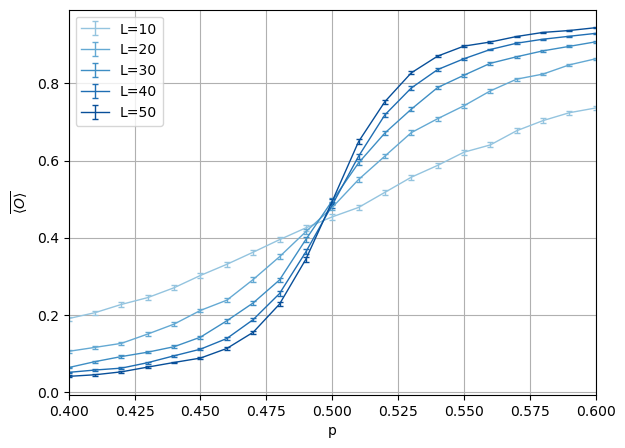

In [20]:
plot_SA_2(df_0_1,L_list=np.arange(10,51,10),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='O',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0.4,0.6)

O_var_L(10,50).png


(0.4, 0.6)

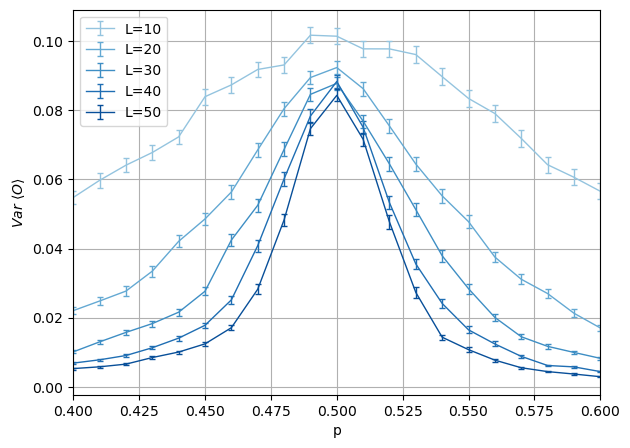

In [49]:
plot_SA_2(df_0_1,L_list=np.arange(10,51,10),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='O',yscale=None,errorbar=True,filename='auto',method=np.var)
plt.gca().set_xlim(0.4,0.6)

In [21]:
optim=Optimizer(p_c=0.5,nu=1.,df=df_0_1,params={'Metrics':'O',},Lmin=20,p_range=[-0.1,0.1])

In [22]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 48.79880217527875
              x: [ 4.975e-01  1.036e+00]
            nit: 31
           nfev: 61
  final_simplex: (array([[ 4.975e-01,  1.036e+00],
                        [ 4.975e-01,  1.036e+00],
                        [ 4.975e-01,  1.036e+00]]), array([ 4.880e+01,  4.880e+01,  4.880e+01])),
 1.016641711984974,
 tensor([0.0002, 0.0038], dtype=torch.float64))

O_Scaling_L(20,60).png


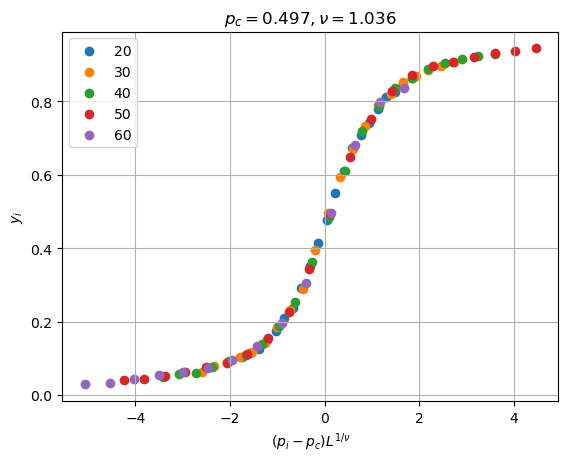

In [23]:
optim.plot_data_collapse()

Text(0, 0.5, '$\\overline{{O}}$')

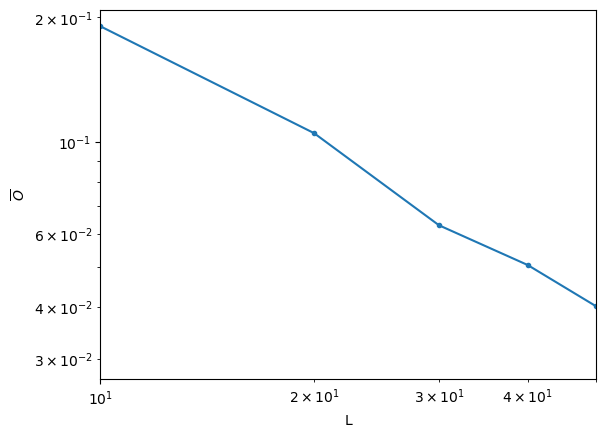

In [74]:
fig,ax=plt.subplots()
ax.plot(df_0_1.xs(key='O',level='Metrics').xs(key=0.4,level='p').xs(key=0,level='adder')['observations'].apply(np.mean),'.-')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10,50])
ax.set_xlabel('L')
ax.set_ylabel('$\overline{{O}}$')

### EE

EE_mean_L(10,50).png


(0.4, 0.6)

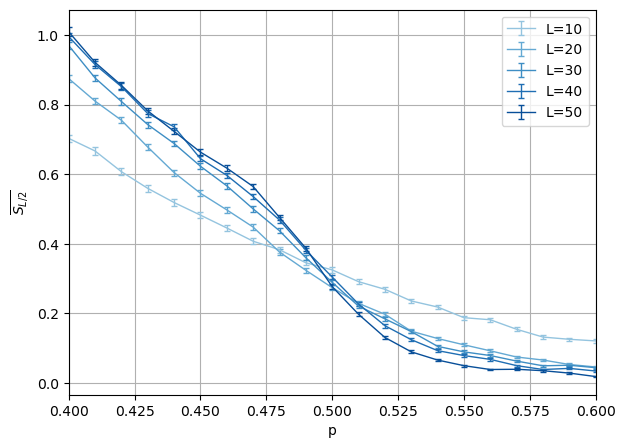

In [49]:
plot_SA_2(df_0_1,L_list=np.arange(10,51,10),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0.4,0.6)

EE_var_L(10,50).png


(0.4, 0.6)

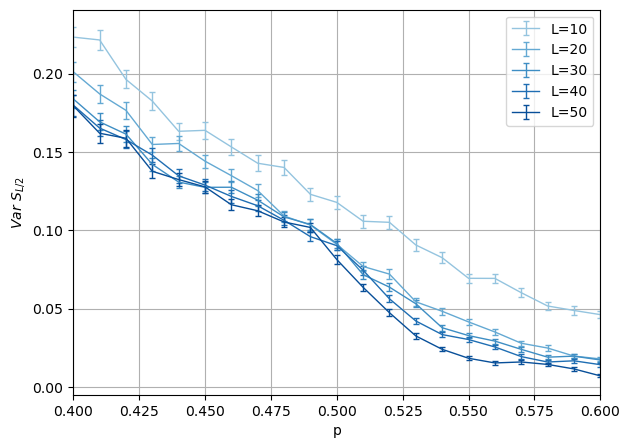

In [48]:
plot_SA_2(df_0_1,L_list=np.arange(10,51,10),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto',method=np.var)
plt.gca().set_xlim(0.4,0.6)

In [ ]:
larger system size , more ensemble size? self average?

In [71]:
optim=Optimizer(p_c=0.497,nu=1.,df=df_0_1,params={'Metrics':'EE',},Lmin=20,p_range=[-0.,0.1])

In [69]:
optim.optimize_scipy()
# optim.optimize_scipy_nu()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 110.81759680107434
              x: [ 5.040e-01  1.052e+00]
            nit: 80
           nfev: 174
  final_simplex: (array([[ 5.040e-01,  1.052e+00],
                        [ 5.040e-01,  1.052e+00],
                        [ 5.040e-01,  1.052e+00]]), array([ 1.108e+02,  1.108e+02,  1.108e+02])),
 5.277028419098778,
 tensor([0.0006, 0.0143], dtype=torch.float64))

EE_Scaling_L(20,60).png


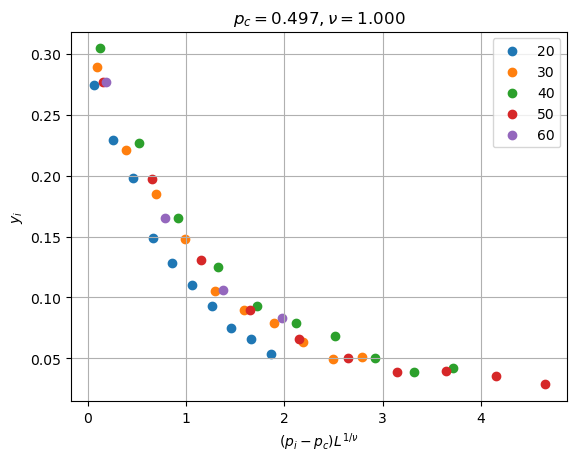

In [72]:
optim.plot_data_collapse()

<Axes: xlabel='L'>

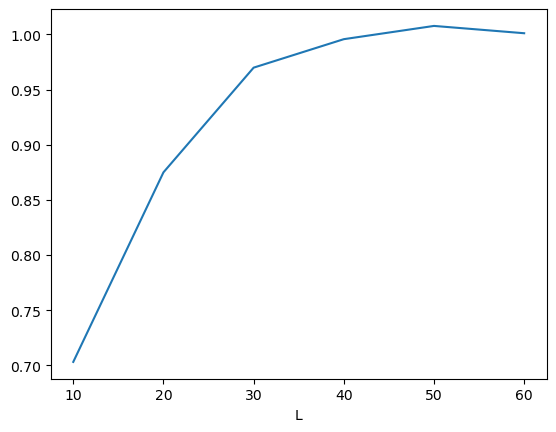

In [75]:
# df_0_1.xs(key='O',level='Metrics').xs(key=0.5,level='p').xs(key=0,level='adder')['observations'].apply(np.mean).plot()
df_0_1.xs(key='EE',level='Metrics').xs(key=0.4,level='p').xs(key=0,level='adder')['observations'].apply(np.mean).plot()

### max_bond

max_bond_mean_L(10,50).png


(0.4, 0.6)

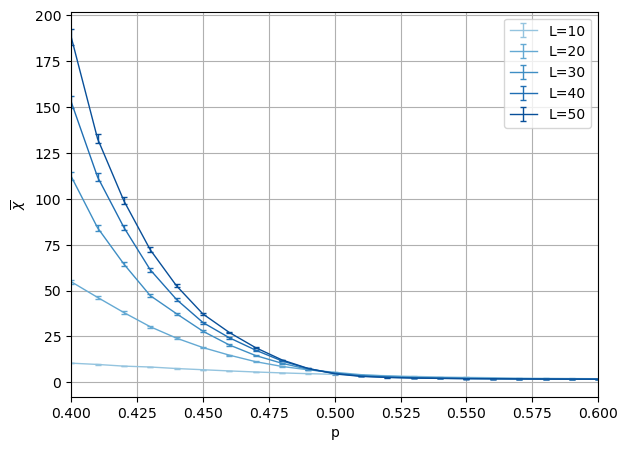

In [46]:
plot_SA_2(df_0_1,L_list=np.arange(10,51,10),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='max_bond',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0.4,0.6)
# plt.gca().set_yscale('log')

max_bond_var_L(10,50).png


(0.4, 0.6)

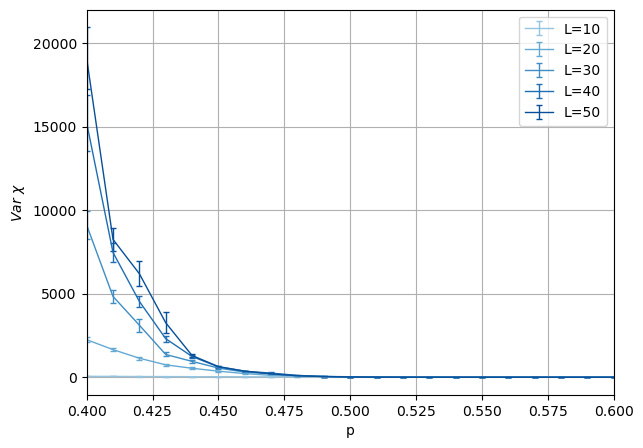

In [52]:
plot_SA_2(df_0_1,L_list=np.arange(10,51,10),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='max_bond',yscale=None,errorbar=True,filename='auto',method=np.var)
plt.gca().set_xlim(0.4,0.6)
# plt.gca().set_yscale('log')

In [61]:
optim=Optimizer(p_c=0.5,nu=1.,df=df_0_1,params={'Metrics':'max_bond',},Lmin=20,p_range=[-0.1,0.02])

In [62]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 2009.8171778565732
              x: [ 4.823e-01  1.101e+00]
            nit: 59
           nfev: 112
  final_simplex: (array([[ 4.823e-01,  1.101e+00],
                        [ 4.823e-01,  1.101e+00],
                        [ 4.823e-01,  1.101e+00]]), array([ 2.010e+03,  2.010e+03,  2.010e+03])),
 64.83281218892172,
 tensor([0.0001, 0.0078], dtype=torch.float64))

max_bond_Scaling_L(20,60).png


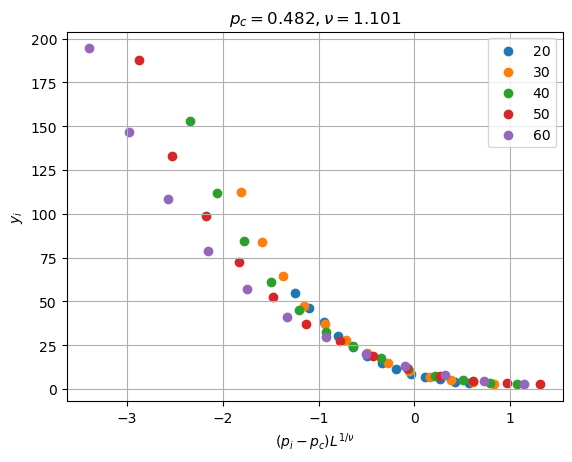

In [63]:
optim.plot_data_collapse()

Text(0, 0.5, '$\\overline{{\\chi}}$')

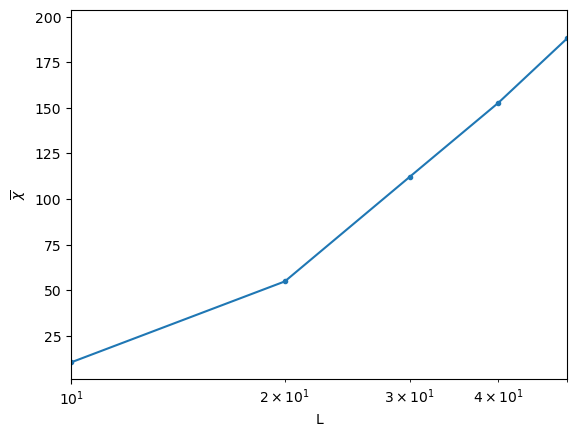

In [63]:
fig,ax=plt.subplots()
ax.plot(df_0_1.xs(key='max_bond',level='Metrics').xs(key=0.4,level='p').xs(key=0,level='adder')['observations'].apply(np.mean),'.-')

ax.set_xscale('log')
ax.set_xlim([10,50])
ax.set_xlabel('L')
ax.set_ylabel('$\overline{{\chi}}$')

# df_0_1.xs(key='max_bond',level='Metrics').xs(key=0.5,level='p').xs(key=0,level='adder')['observations'].apply(np.mean).plot()

### Sanc

In [57]:
df_0_1_anc_first2000= df_0_1_anc.apply(lambda x: x[:2000],axis=1)

In [63]:
df_0_1_anc_first2000=df_0_1_anc.copy()

In [64]:
df_0_1_anc_first2000['observations']=df_0_1_anc['observations'].apply(lambda x: x[:2000])

EE_mean_L(8,12).png


Text(0, 0.5, '$\\overline{S_{anc}}$')

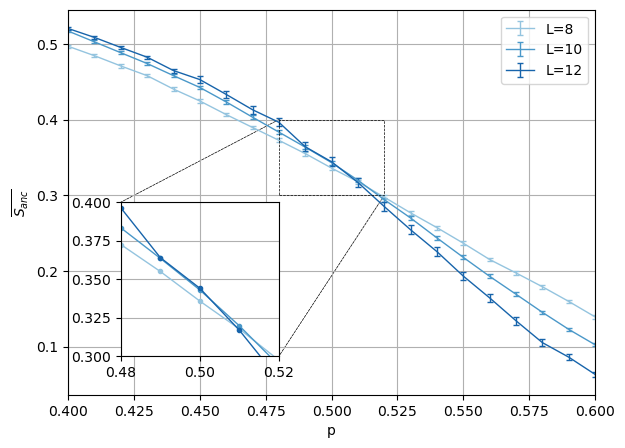

In [17]:
# np.arange(10,51,10)
# L_list= np.array(range(8,21,2))
L_list= np.array(range(8,13,2))

plot_SA_2(df_0_1_anc,L_list=L_list,inset1=False,xlim1=[.28,.32],ylim1=[.1,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.48,0.52],ylim2=[3e-1,4e-1],ax_inset_pos2=[.1,.1,.3,.4],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0.4,0.6)
plt.gca().set_ylabel('$\overline{S_{anc}}$')
# plt.gca().set_yticks([x*np.log(2) for x in np.linspace(0,0.8,9)],labels=[round(x,2) for x in np.linspace(0,0.8,9)])

In [71]:
optim=Optimizer(p_c=0.5,nu=1.,df=df_0_1_anc,params={'Metrics':'EE',},Lmin=8,Lmax=14,p_range=[-0.1,0.1])

In [72]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 104.50727523631627
              x: [ 4.963e-01  1.251e+00]
            nit: 83
           nfev: 171
  final_simplex: (array([[ 4.963e-01,  1.251e+00],
                        [ 4.963e-01,  1.251e+00],
                        [ 4.963e-01,  1.251e+00]]), array([ 1.045e+02,  1.045e+02,  1.045e+02])),
 2.54895793259308,
 tensor([0.0009, 0.0218], dtype=torch.float64))

EE_Scaling_L(8,14).png


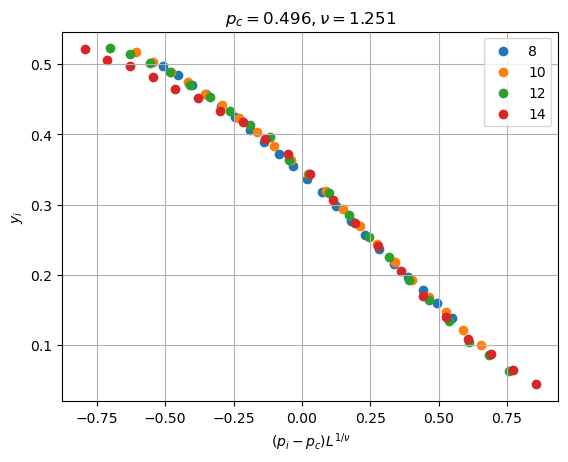

In [73]:
optim.plot_data_collapse()

EE_var_L(8,50).png


Text(0, 0.5, '$Var~{S_{anc}}$')

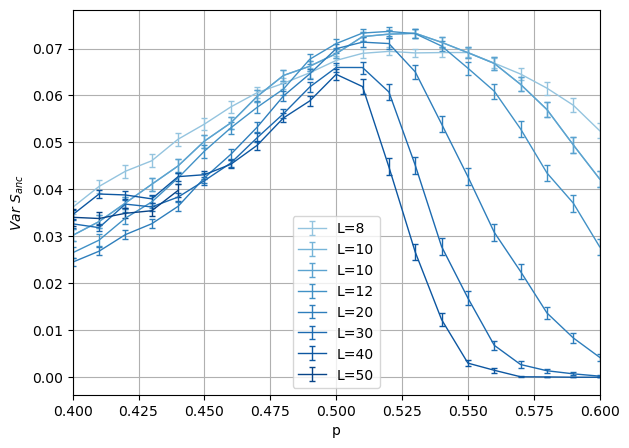

In [44]:
# np.arange(10,51,10)

plot_SA_2(df_0_1_anc,L_list=np.array([8,10,12,]+list(range(10,51,10))),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto',method=np.var)
plt.gca().set_xlim(0.4,0.6)
plt.gca().set_ylabel('$Var~{S_{anc}}$')

# obs-del

In [ ]:
    # for L in tqdm(L_list):
    #     for p in p_list:
    #         for seed in seed_list:
    #             for ancilla in ancilla_list:

In [ ]:
  # if filelist is None:
                    #     file_exist = os.path.exists(os.path.join(fn_dir,fn))
                    # else:
                    #     with open(filelist,'r') as f:
                    #         fn_list=f.read().split('\n')
                    #     file_exist = fn in fn_list
                        
                    # if not file_exist:
                    #     params_text.append(f'{p:.3f} {L} {seed} {ancilla}')
                    # elif exist:
                    #     params_text.append(fn)
                    #     if load:
                    #         try:
                    #             # data=load_json(os.path.join(fn_dir,fn))
                    #             add_to_dict(data_dict,fn,fn_dir)
                    #         except:
                    #             print(f'Error loading {fn}')

In [ ]:
def generate_params(nu,de,L_list,seed_list,p_list,ancilla_list,filename='params.txt',exist=False,filelist=None,load=False,data_dict=None,fn_dir='auto',load_data=load_json):
    fn_template='MPS_({nu},{de})_L{L}_p{p:.3f}_s{s}_a{a}.json'
    params_text=[]
    if fn_dir=='auto':
        fn_dir=f'MPS_{nu}-{de}'

    inputs = [ (L,p,seed,ancilla) for L in L_list for p in p_list for seed in seed_list for ancilla in ancilla_list]
        
    for L,p,seed,ancilla in tqdm(inputs):
        fn=fn_template.format(nu=nu,de=de,L=L,p=p,s=seed,a=ancilla)
        if load:
            if fn not in data_dict['fn']:
                if os.path.exists(os.path.join(fn_dir,fn)):
                    data=load_data(os.path.join(fn_dir,fn))
                    add_to_dict(data_dict,data,fn)
        else:
            # generate params
            if filelist is None:
                file_exist = os.path.exists(os.path.join(fn_dir,fn))
            else:
                with open(filelist,'r') as f:
                    fn_list=f.read().split('\n')
                file_exist = fn in fn_list
            
            if not file_exist:
                params_text.append(f'{p:.3f} {L} {seed} {ancilla}')
            elif exist:
                params_text.append(fn)

    if filename is not None:
        with open(filename,'a') as f:
            f.write('\n'.join(params_text)+'\n')

    return params_text